# Part 1: Pre-trained Object Detection of Street Scene
[Part 1: Pre-trained Object Detection of Street Scene](#part1)

# Part 2: YOLOV8 Custom Training
[Part 2: YOLOV8 Custom Training](#part2)

<a id='part1' name='part1'></a>
## Part 1: Pre-trained Object Detection of Street Scene

Using available pre-trained models for object detection, conduct inference on a short video (5-10 seconds) of a street scene drawing bounding boxes around detected vehicles.

Step 1. Collect a source video. It may be necessary to divide the video into discrete image frames.

Step 2. Conduct inference on each frame of the video, drawing bounding boxes around detected vehicles.

Step 3. Format the results back into a video.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 246MB/s]


In [ ]:
# import cv2
# import os

# vid = cv2.VideoCapture('/content/drive/MyDrive/IMG_9356.MOV')
# frame_rate = 20
# frame_count = 0
# output_frames = []

# while vid.isOpened():
#   ret, frame = vid.read()

#   if not ret:
#       break

#   if frame_count % frame_rate == 0:
#       output_frames.append(frame)
#       print("Appending", len(output_frames))
#       frame_filename = f'/content/drive/MyDrive/Data 255 HW/Assignment 4/Images/InputFrames/frame_{frame_count}.jpg'
#       cv2.imwrite(frame_filename, frame)

#   frame_count += 1

Appending 1
Appending 2
Appending 3
Appending 4
Appending 5
Appending 6
Appending 7
Appending 8
Appending 9
Appending 10
Appending 11
Appending 12
Appending 13
Appending 14
Appending 15
Appending 16
Appending 17
Appending 18
Appending 19
Appending 20
Appending 21
Appending 22
Appending 23
Appending 24


In [ ]:
# fps = vid.get(cv2.CAP_PROP_FPS)
# print(f"{fps} frames per second")

59.94005994005994 frames per second


Step 1. Collect a source video. It may be necessary to divide the video into discrete image frames.

In [ ]:
source = '/content/drive/MyDrive/IMG_9356.MOV'
outputPath = '/content/drive/MyDrive/Data 255 HW/Assignment 4/Images/OutputFrames/'

In [ ]:
results = model(source, stream=True, vid_stride=5)

Step 2. Conduct inference on each frame of the video, drawing bounding boxes around detected vehicles.

In [ ]:
frame_count = 0
for result in results:
  boxes = result.boxes  # Boxes object for bounding box outputs
  masks = result.masks  # Masks object for segmentation masks outputs
  keypoints = result.keypoints  # Keypoints object for pose outputs
  probs = result.probs  # Probs object for classification outputs
  result.show()  # display to screen
  result.save(filename=outputPath + 'result_' + str(frame_count) + '.jpg')
  frame_count += 1


video 1/1 (1/95) /content/drive/MyDrive/IMG_9356.MOV: 640x384 5 persons, 3 cars, 141.8ms
video 1/1 (2/95) /content/drive/MyDrive/IMG_9356.MOV: 640x384 7 persons, 3 cars, 153.0ms
video 1/1 (3/95) /content/drive/MyDrive/IMG_9356.MOV: 640x384 4 persons, 2 cars, 173.5ms
video 1/1 (4/95) /content/drive/MyDrive/IMG_9356.MOV: 640x384 5 persons, 2 cars, 138.0ms
video 1/1 (5/95) /content/drive/MyDrive/IMG_9356.MOV: 640x384 3 persons, 2 cars, 1 fire hydrant, 244.9ms
video 1/1 (6/95) /content/drive/MyDrive/IMG_9356.MOV: 640x384 5 persons, 2 cars, 136.5ms
video 1/1 (7/95) /content/drive/MyDrive/IMG_9356.MOV: 640x384 6 persons, 3 cars, 179.7ms
video 1/1 (8/95) /content/drive/MyDrive/IMG_9356.MOV: 640x384 5 persons, 3 cars, 233.2ms
video 1/1 (9/95) /content/drive/MyDrive/IMG_9356.MOV: 640x384 6 persons, 5 cars, 149.0ms
video 1/1 (10/95) /content/drive/MyDrive/IMG_9356.MOV: 640x384 2 persons, 4 cars, 130.9ms
video 1/1 (11/95) /content/drive/MyDrive/IMG_9356.MOV: 640x384 5 persons, 3 cars, 1 truck, 1

In [ ]:
# video_name = 'annotated_video.avi'
# images = [img for img in os.listdir(outputPath) if img.endswith(".jpg")]
# frame = cv2.imread(os.path.join(outputPath, images[0]))
# height, width, layers = frame.shape

# video = cv2.VideoWriter(os.path.join(outputPath, video_name), 0, 1, (width,height))

# for image in images:
#     video.write(cv2.imread(os.path.join(outputPath, image)))

# cv2.destroyAllWindows()
# video.release()

Step 3. Format the results back into a video.

In [ ]:
video_name = 'annotated_video.mp4'
images = [img for img in os.listdir(outputPath) if img.endswith(".jpg")]
frame = cv2.imread(os.path.join(outputPath, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(os.path.join(outputPath, video_name), cv2.VideoWriter_fourcc(*'MP4V'), 10, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(outputPath, image)))

cv2.destroyAllWindows()
video.release()

<a id='part2' name='part2'></a>
## Part 2: YOLOV8 Custom Training

Follow the steps in YOLOV8 and attach a screenshot of object detection

Windows: https://medium.com/@pat.x.guillen/a-step-by-step-guide-to-running-yolov8-on-windows-122cb586b567Links to an external site.

Mac: https://pysource.com/2023/03/28/object-detection-with-yolo-v8-on-mac-m1/Links to an external site.

buttery fly dataset: use ~10 images from

https://universe.roboflow.com/yolo-a6y21/squid-bat-butterflyLinks to an external site.

In [ ]:
!pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="api_key")
# project = rf.workspace("yolo-a6y21").project("squid-bat-butterfly")
# dataset = project.version(2).download("yolov5")



In [ ]:
# !yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

In [ ]:
# dataset.location

Using the Python SDK of YOLO V8 to perform the custom training and validation.

In [ ]:
model = YOLO('yolov8s.pt')

In [21]:
model.train(data="/content/drive/MyDrive/Data 255 HW/Assignment 4/Squid Bat Butterfly.v2i.yolov8/data.yaml", epochs=10)

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Data 255 HW/Assignment 4/Squid Bat Butterfly.v2i.yolov8/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fa

train: Scanning /content/drive/MyDrive/Data 255 HW/Assignment 4/Squid Bat Butterfly.v2i.yolov8/train/labels.cache... 69 images, 0 backgrounds, 0 corrupt: 100%|██████████| 69/69 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Data 255 HW/Assignment 4/Squid Bat Butterfly.v2i.yolov8/valid/labels.cache... 27 images, 0 backgrounds, 0 corrupt: 100%|██████████| 27/27 [00:00<?, ?it/s]


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train11
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.551      5.096      2.168          5        640: 100%|██████████| 5/5 [02:45<00:00, 33.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:23<00:00, 23.73s/it]

                   all         27         39       0.42      0.371      0.344        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.9822      2.731      1.634          5        640: 100%|██████████| 5/5 [02:26<00:00, 29.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:24<00:00, 24.23s/it]

                   all         27         39      0.479      0.381      0.271       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      0.911      2.359      1.612          6        640: 100%|██████████| 5/5 [02:40<00:00, 32.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.350s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:21<00:00, 21.89s/it]

                   all         27         39      0.588      0.333      0.444      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.8767      2.108       1.66          5        640: 100%|██████████| 5/5 [02:32<00:00, 30.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:19<00:00, 19.06s/it]

                   all         27         39      0.414       0.68      0.527      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.8272        1.7       1.54          8        640: 100%|██████████| 5/5 [02:21<00:00, 28.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.88s/it]

                   all         27         39      0.738      0.571      0.534      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.6986      1.412      1.457          6        640: 100%|██████████| 5/5 [02:26<00:00, 29.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.29s/it]

                   all         27         39      0.601      0.481      0.557      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.6383      1.299      1.317          5        640: 100%|██████████| 5/5 [02:20<00:00, 28.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:19<00:00, 19.43s/it]

                   all         27         39      0.693      0.524      0.564      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.5468     0.9941      1.236          6        640: 100%|██████████| 5/5 [02:22<00:00, 28.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.83s/it]

                   all         27         39      0.702      0.524       0.56      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.5599     0.9509       1.25          6        640: 100%|██████████| 5/5 [02:21<00:00, 28.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.43s/it]

                   all         27         39      0.488      0.673      0.584      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.5617     0.8949      1.307          5        640: 100%|██████████| 5/5 [02:23<00:00, 28.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.18s/it]

                   all         27         39      0.518      0.689      0.605      0.328



10 epochs completed in 0.474 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 22.5MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:16<00:00, 16.95s/it]


                   all         27         39      0.518      0.689      0.605      0.331
                   Bat         27         21      0.574      0.513      0.559       0.21
             Butterfly         27          9      0.207      0.556      0.283      0.175
                 Squid         27          9      0.774          1      0.973       0.61
Speed: 2.6ms preprocess, 607.6ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train11


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b8b2af53f10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

Plotting the Confusion Matrix, Results, Predictions

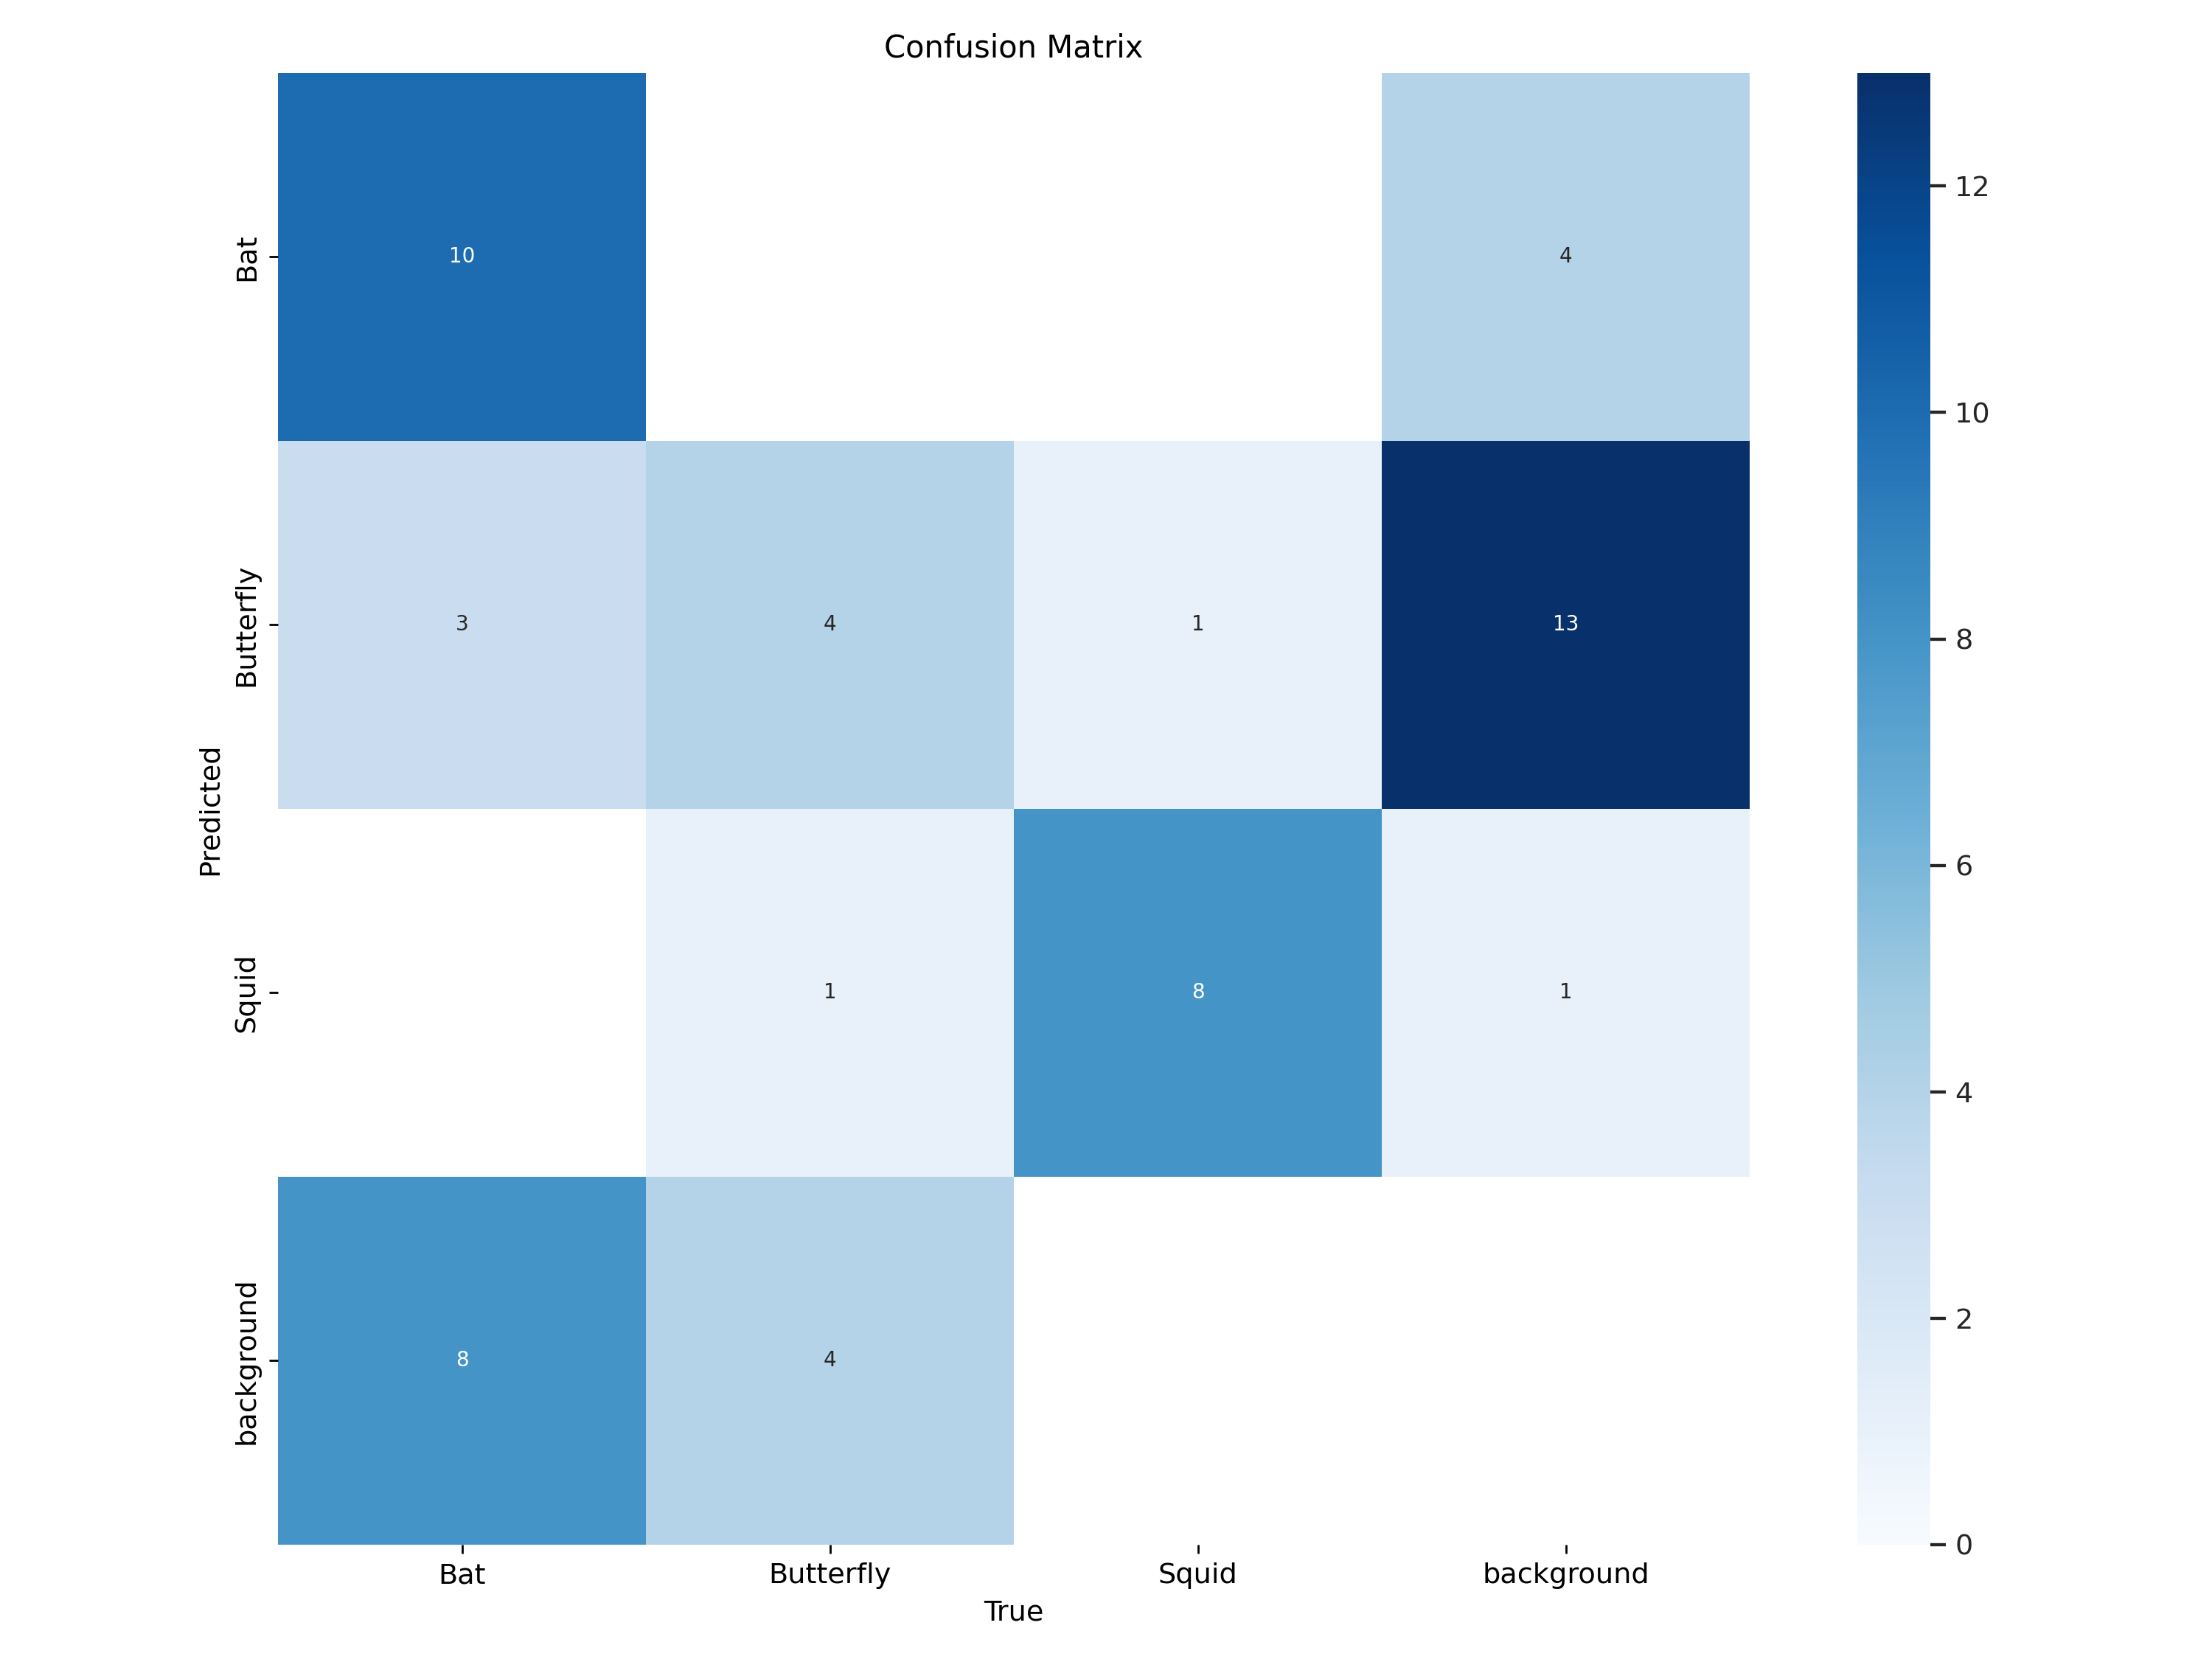

In [22]:
from IPython.display import Image
Image(filename='/content/runs/detect/train11/confusion_matrix.png', width=600)

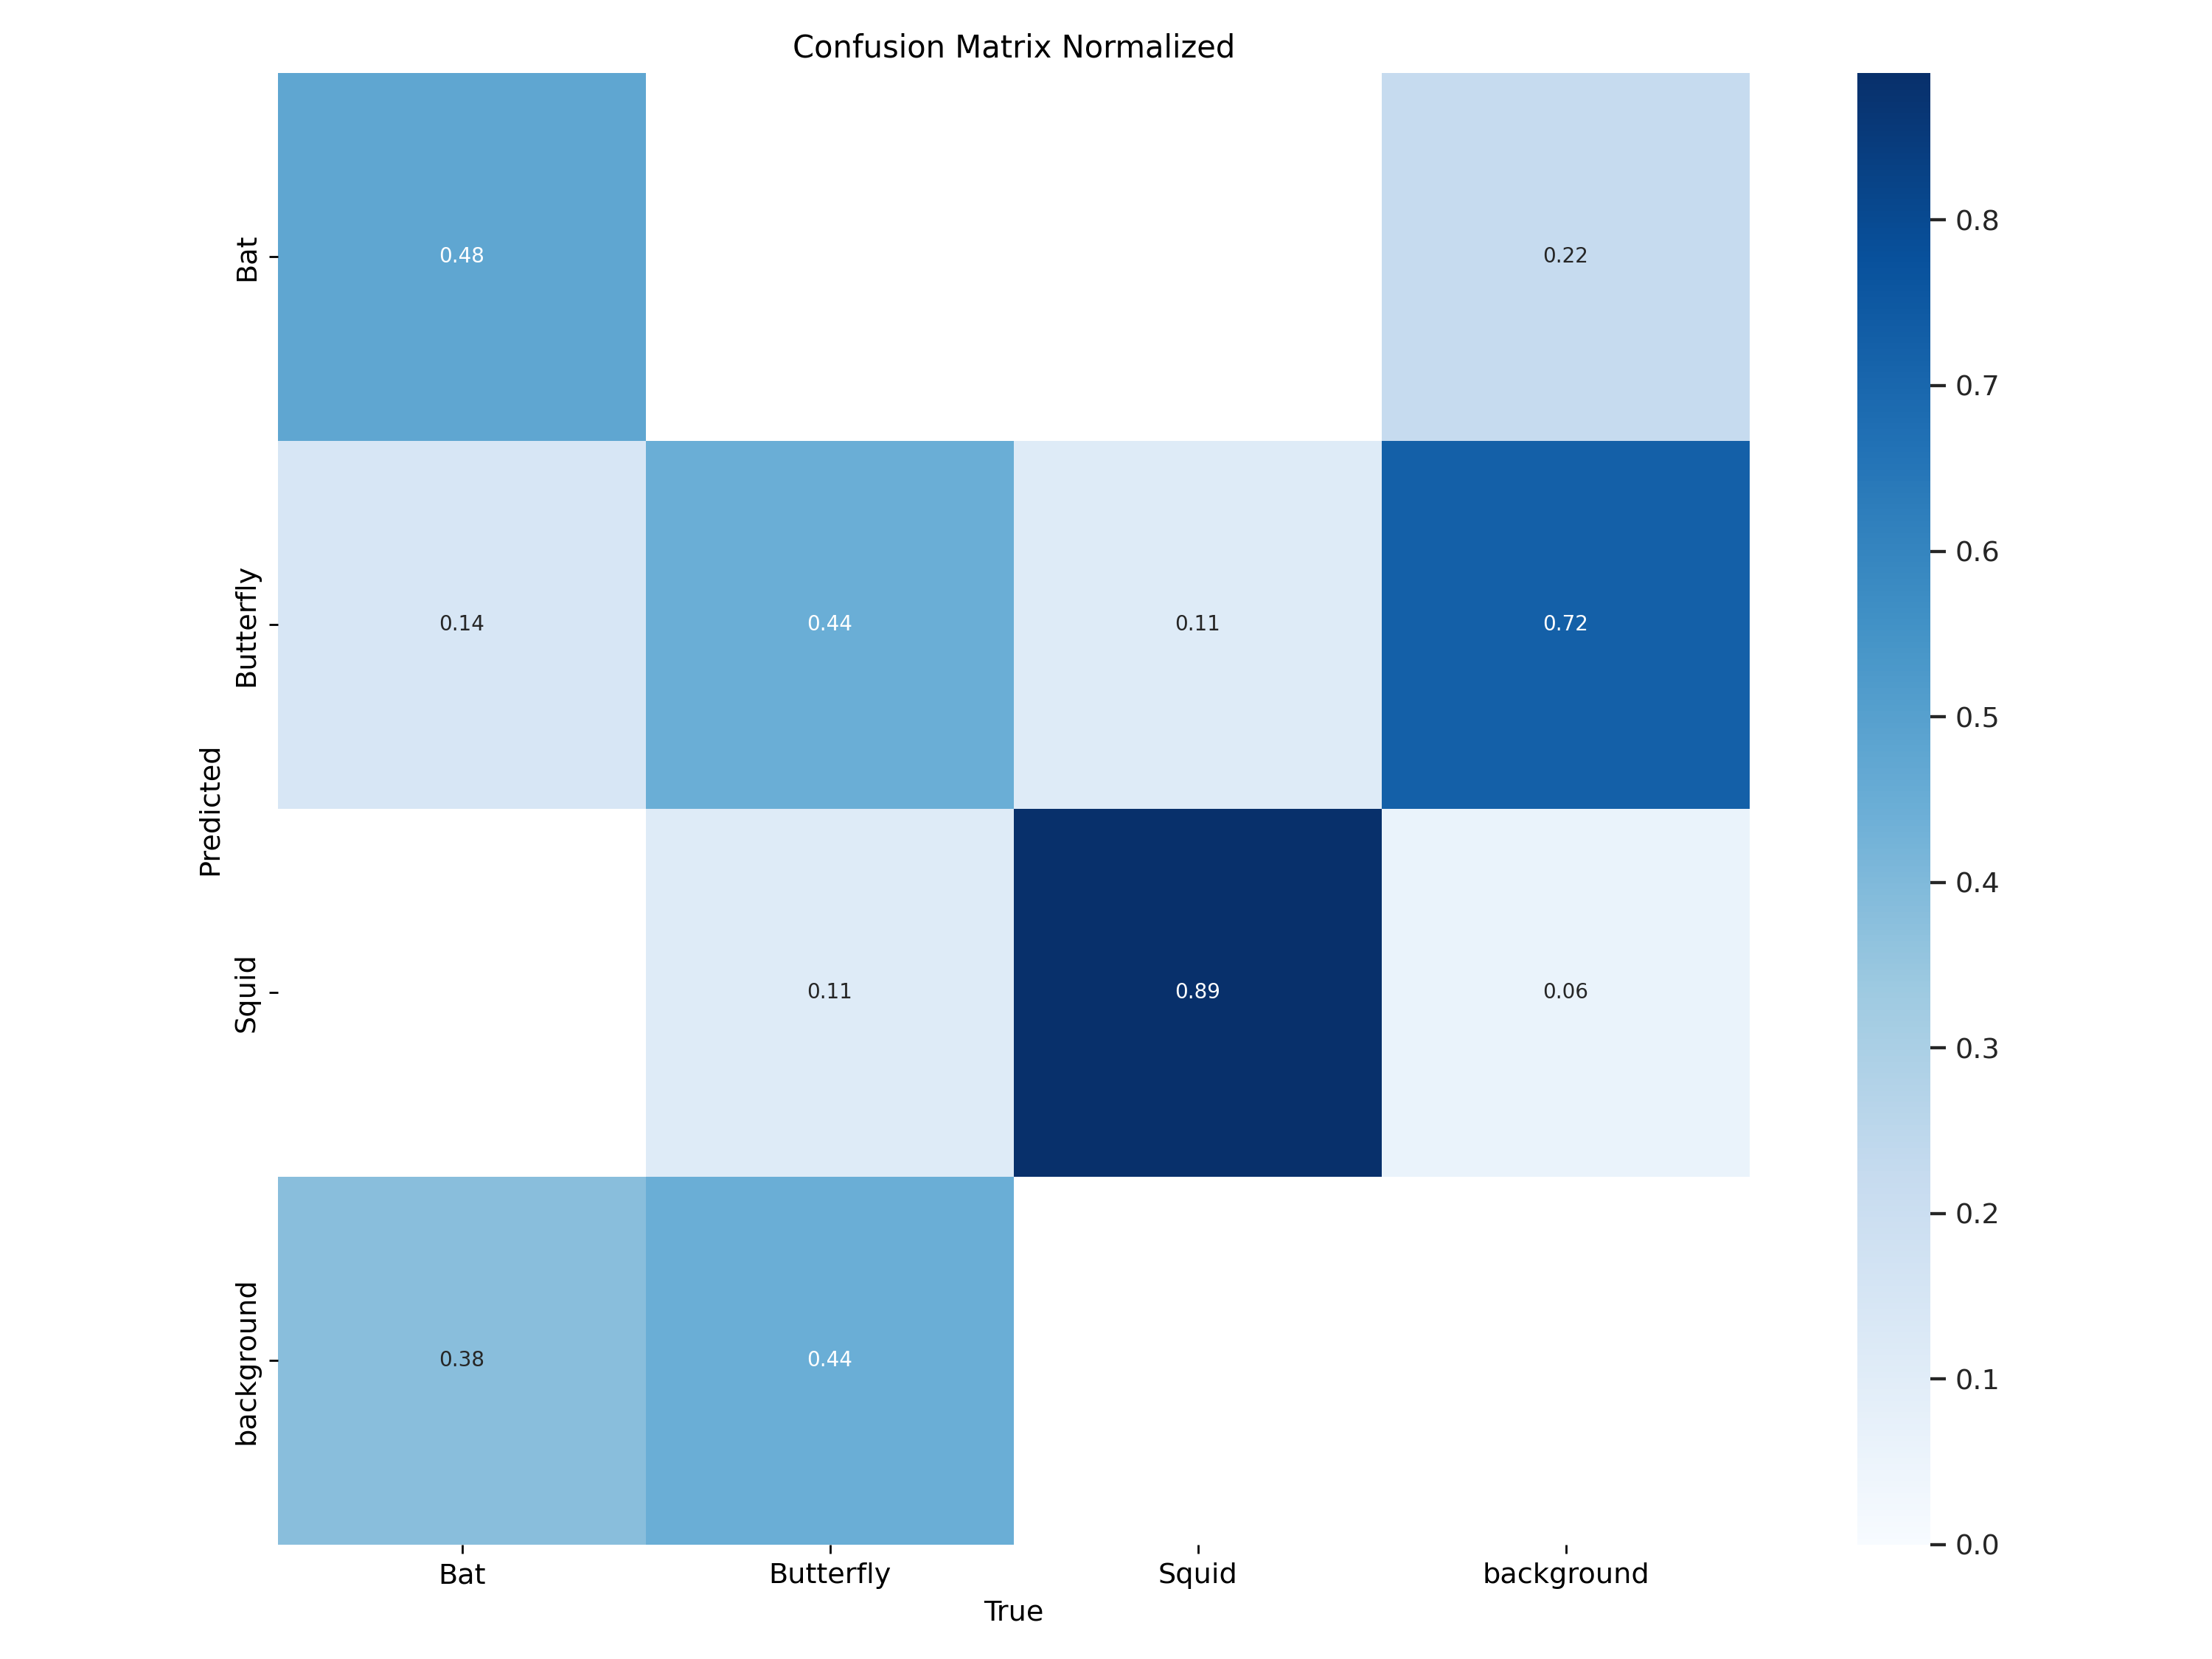

In [23]:
Image(filename='/content/runs/detect/train11/confusion_matrix_normalized.png', width=600)

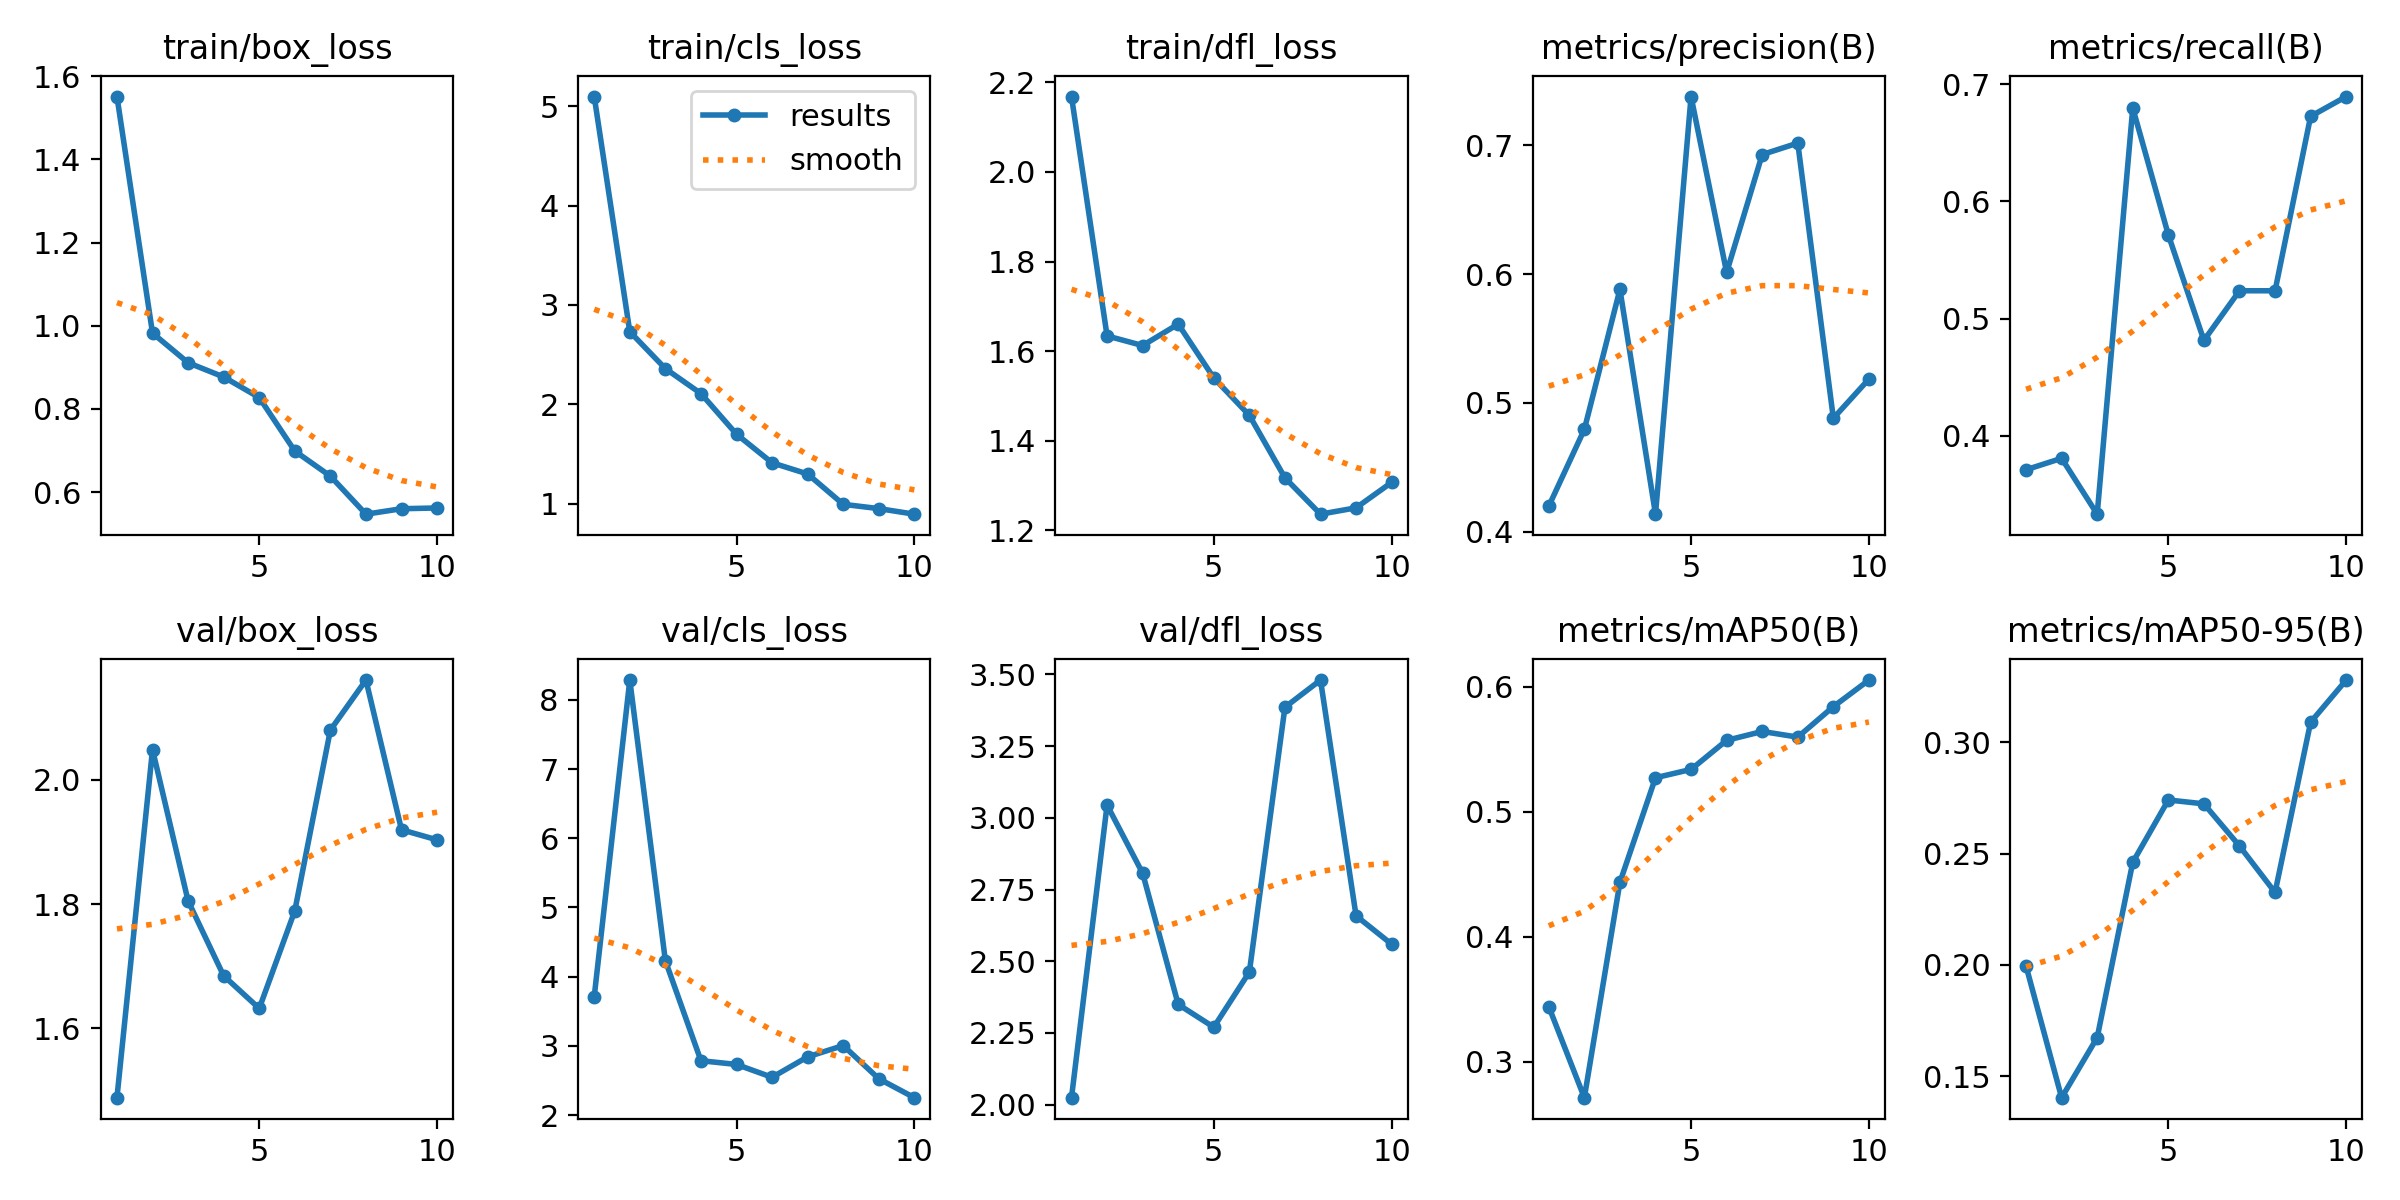

In [24]:
Image(filename='/content/runs/detect/train11/results.png', width=600)

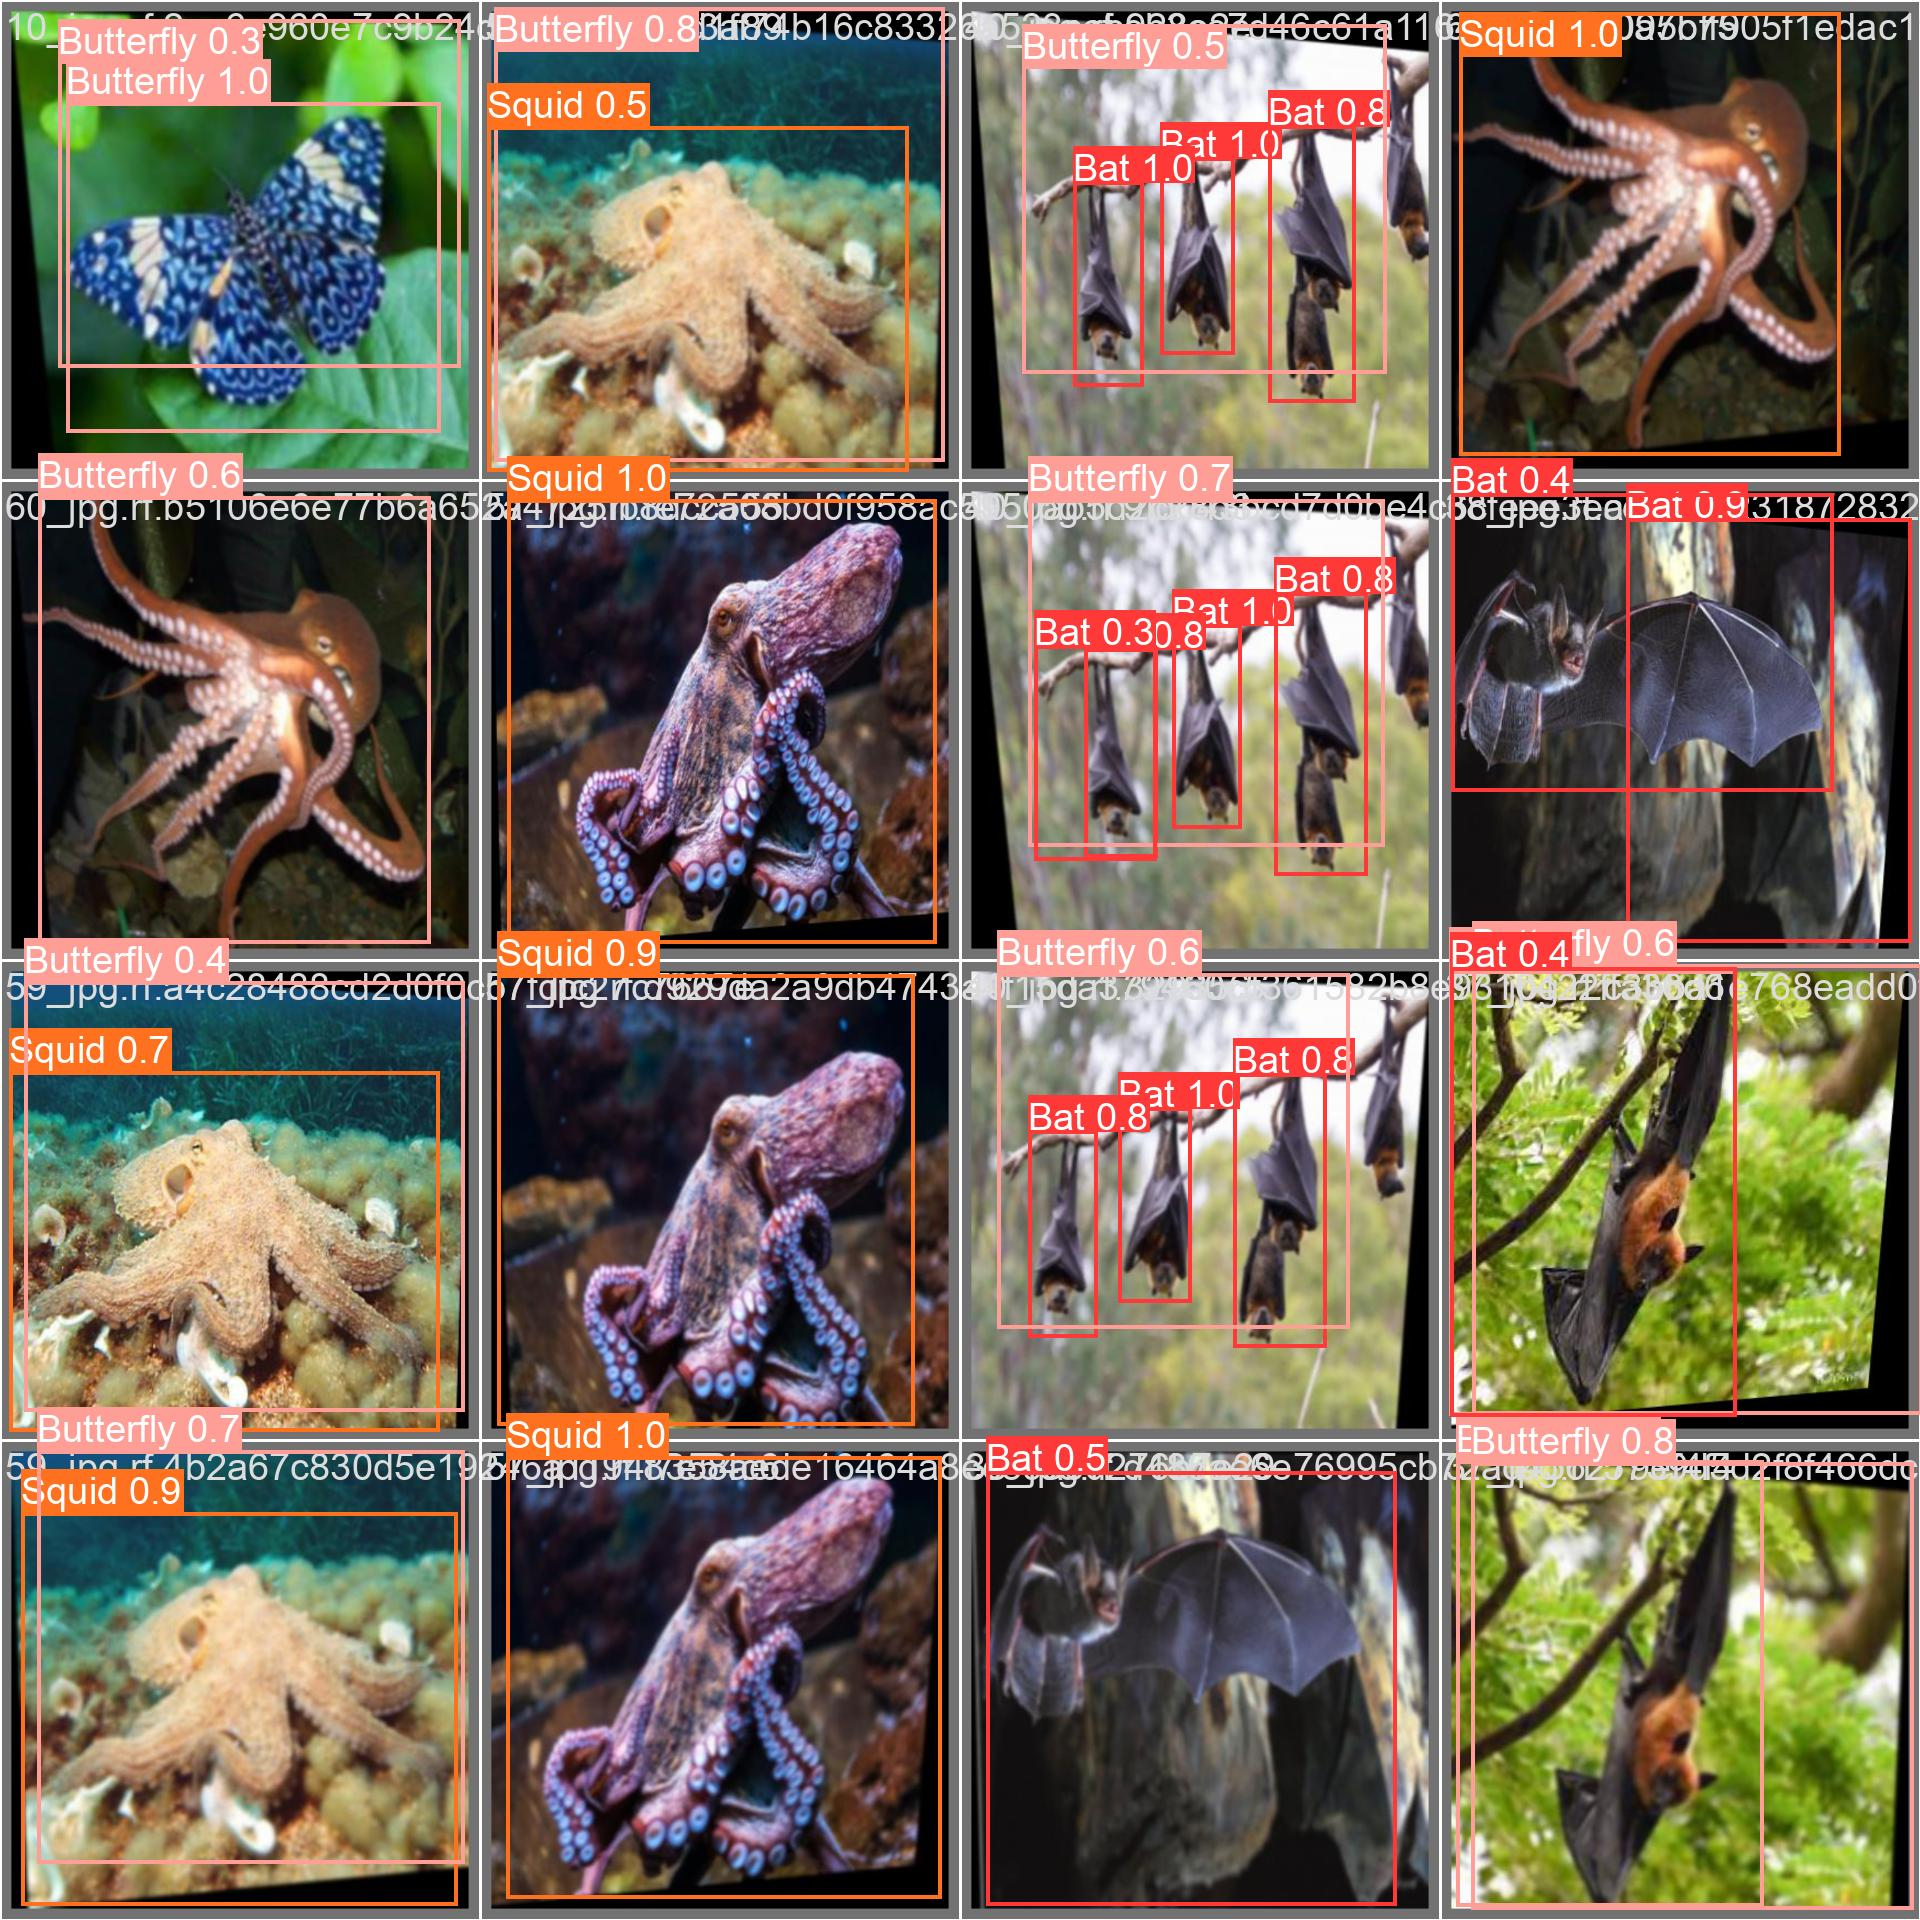

In [25]:
Image(filename='/content/runs/detect/train11/val_batch0_pred.jpg', width=600)

Running Validation Separately.

Note: Validation was already performed during training

In [26]:
model.val(data="/content/drive/MyDrive/Data 255 HW/Assignment 4/Squid Bat Butterfly.v2i.yolov8/data.yaml")

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/Data 255 HW/Assignment 4/Squid Bat Butterfly.v2i.yolov8/valid/labels.cache... 27 images, 0 backgrounds, 0 corrupt: 100%|██████████| 27/27 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.06s/it]


                   all         27         39      0.518      0.689      0.605      0.331
                   Bat         27         21      0.574      0.513      0.559       0.21
             Butterfly         27          9      0.207      0.556      0.283      0.175
                 Squid         27          9      0.774          1      0.973       0.61
Speed: 3.1ms preprocess, 643.8ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train112


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b8b25f8cc70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

Plotting F1 and PR Curve from Validation.

Printing the predictions during validation as well

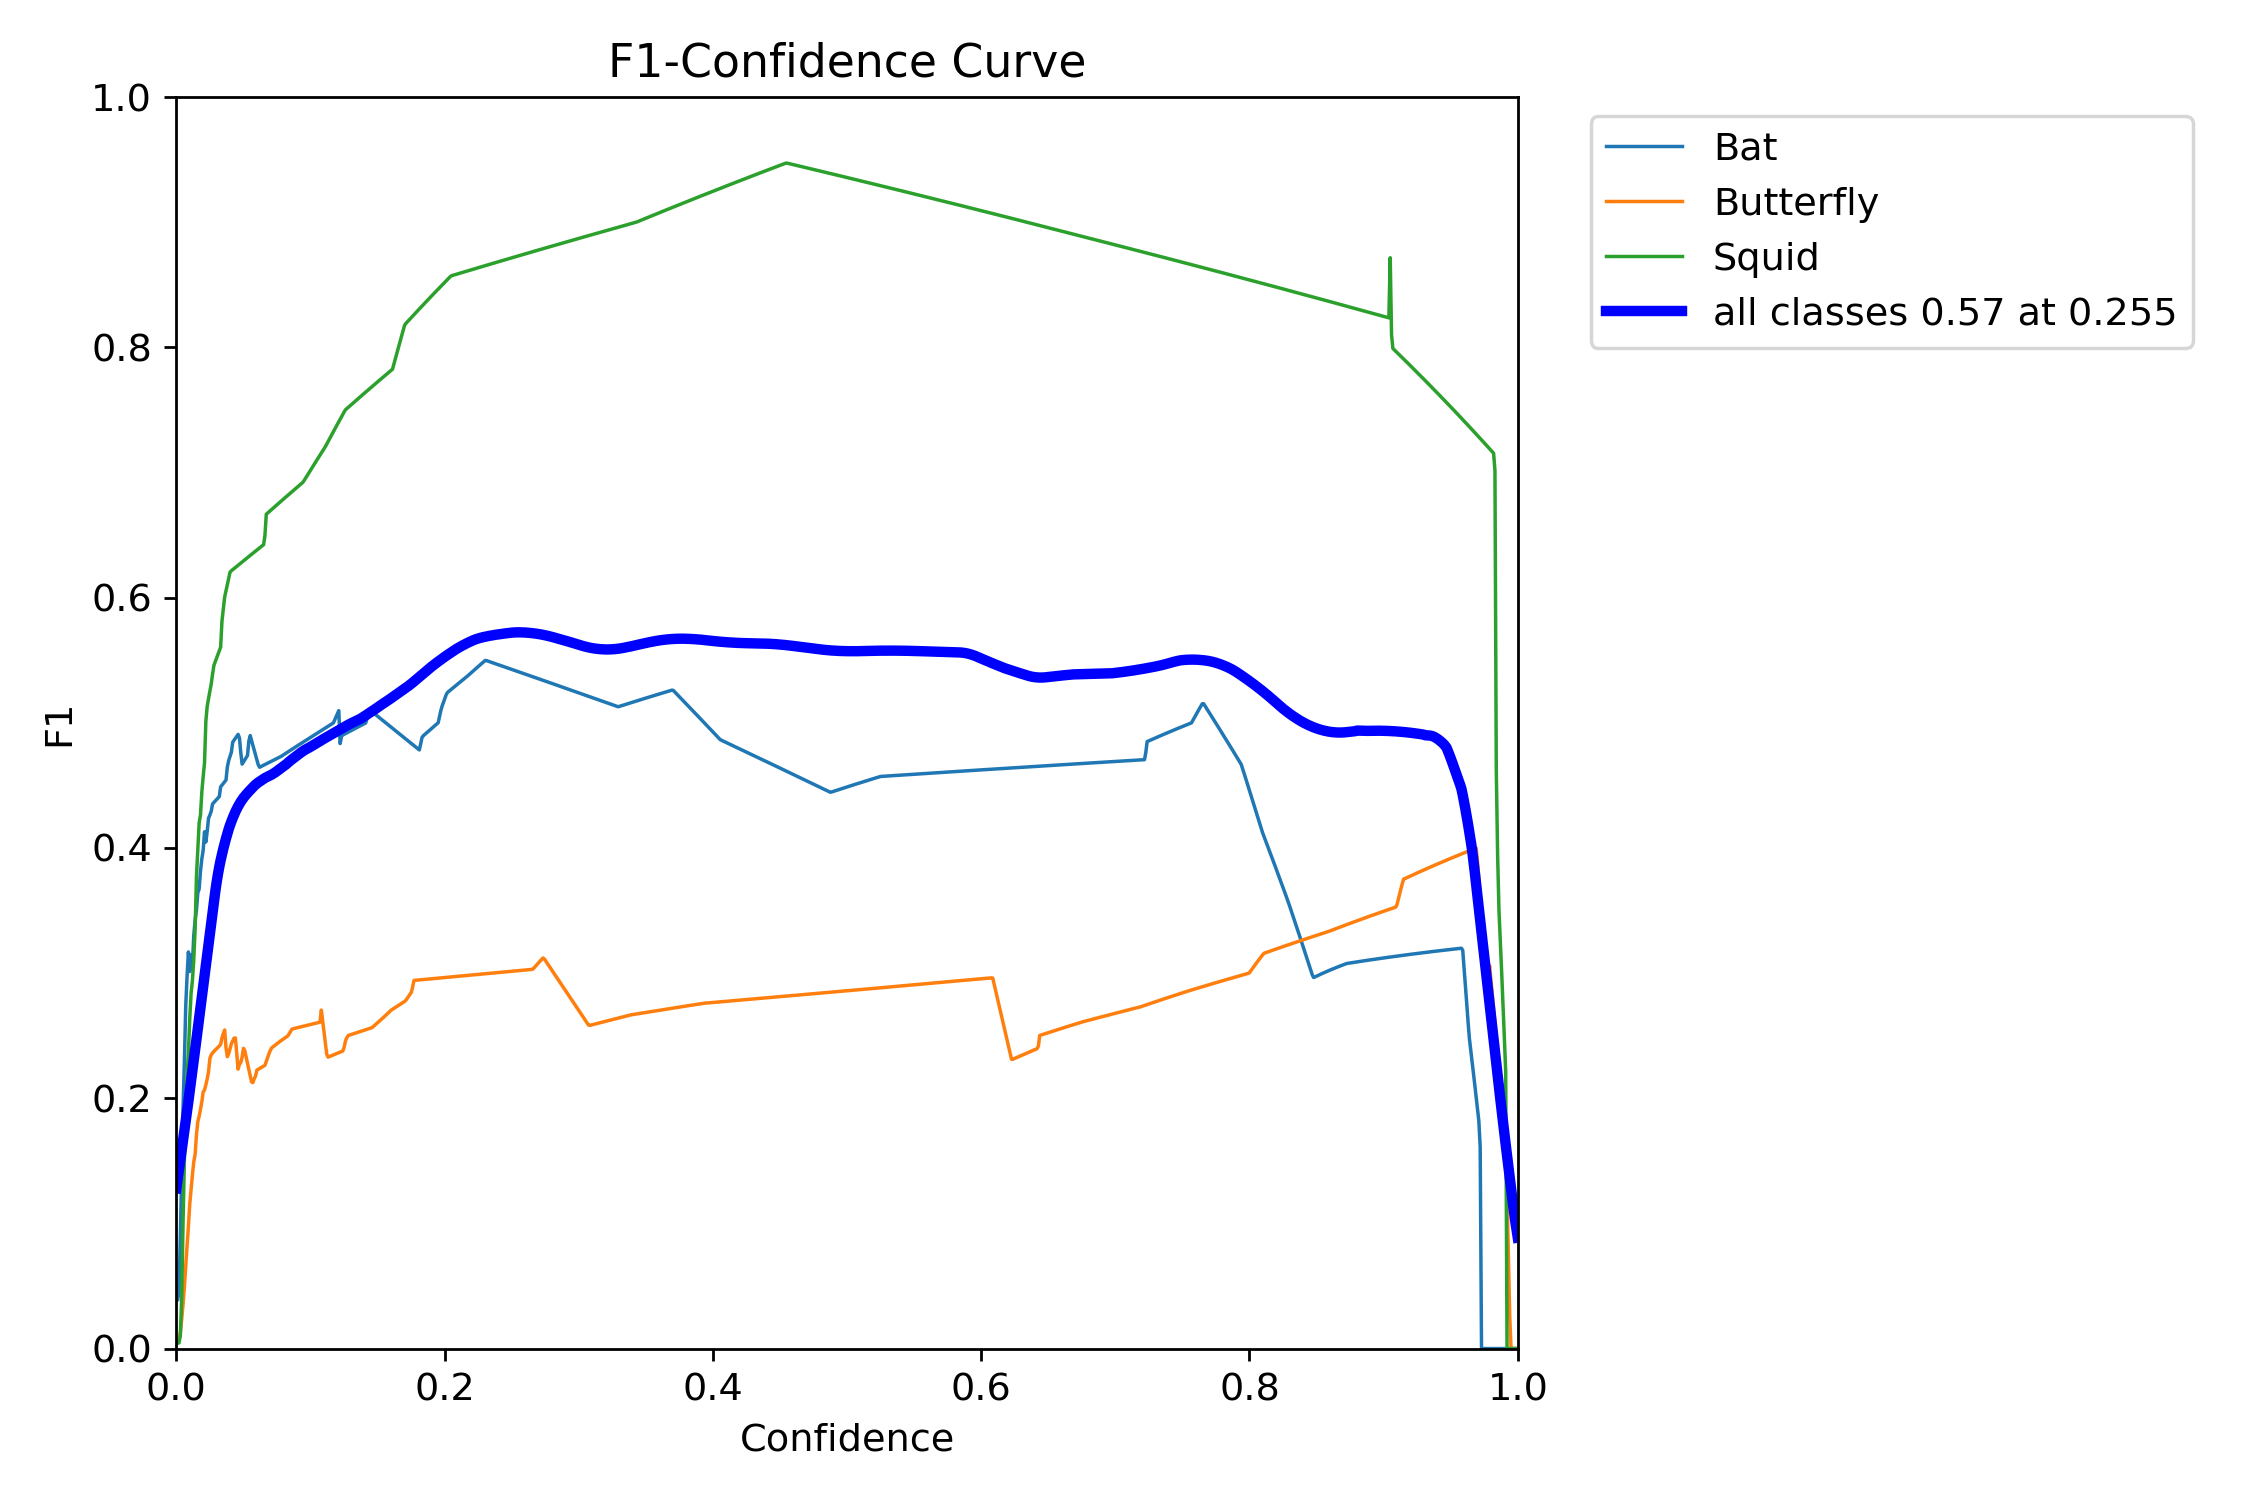

In [27]:
Image(filename='/content/runs/detect/train112/F1_curve.png', width=600)

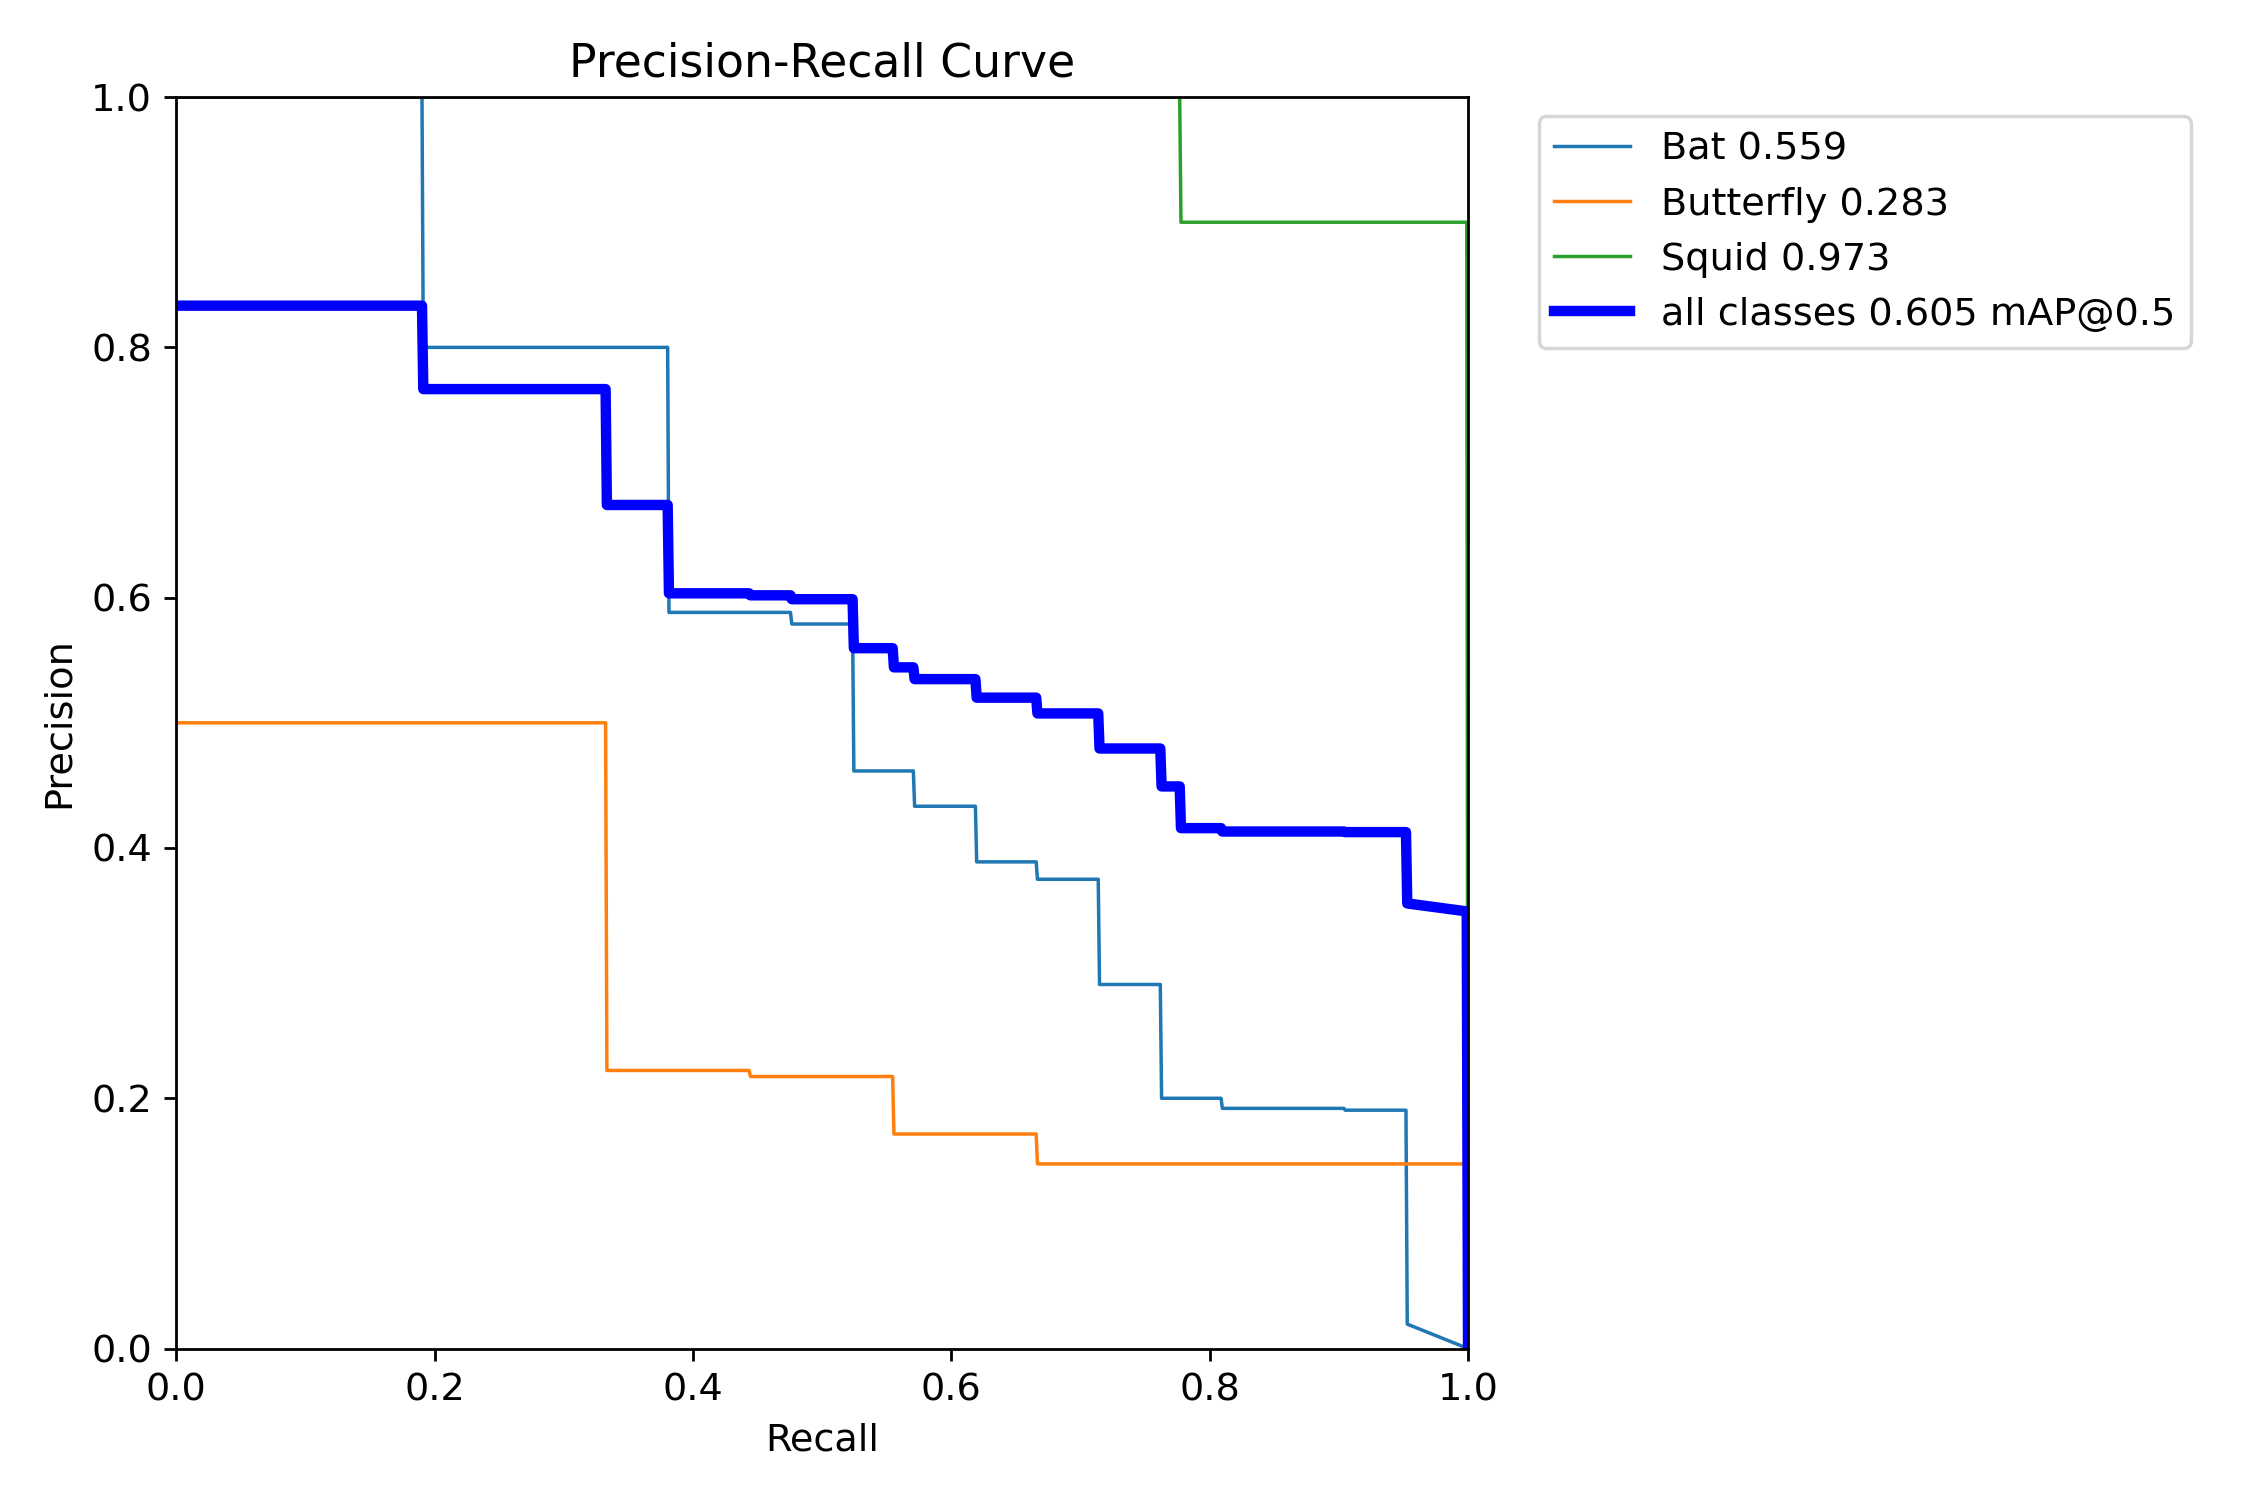

In [28]:
Image(filename='/content/runs/detect/train112/PR_curve.png', width=600)

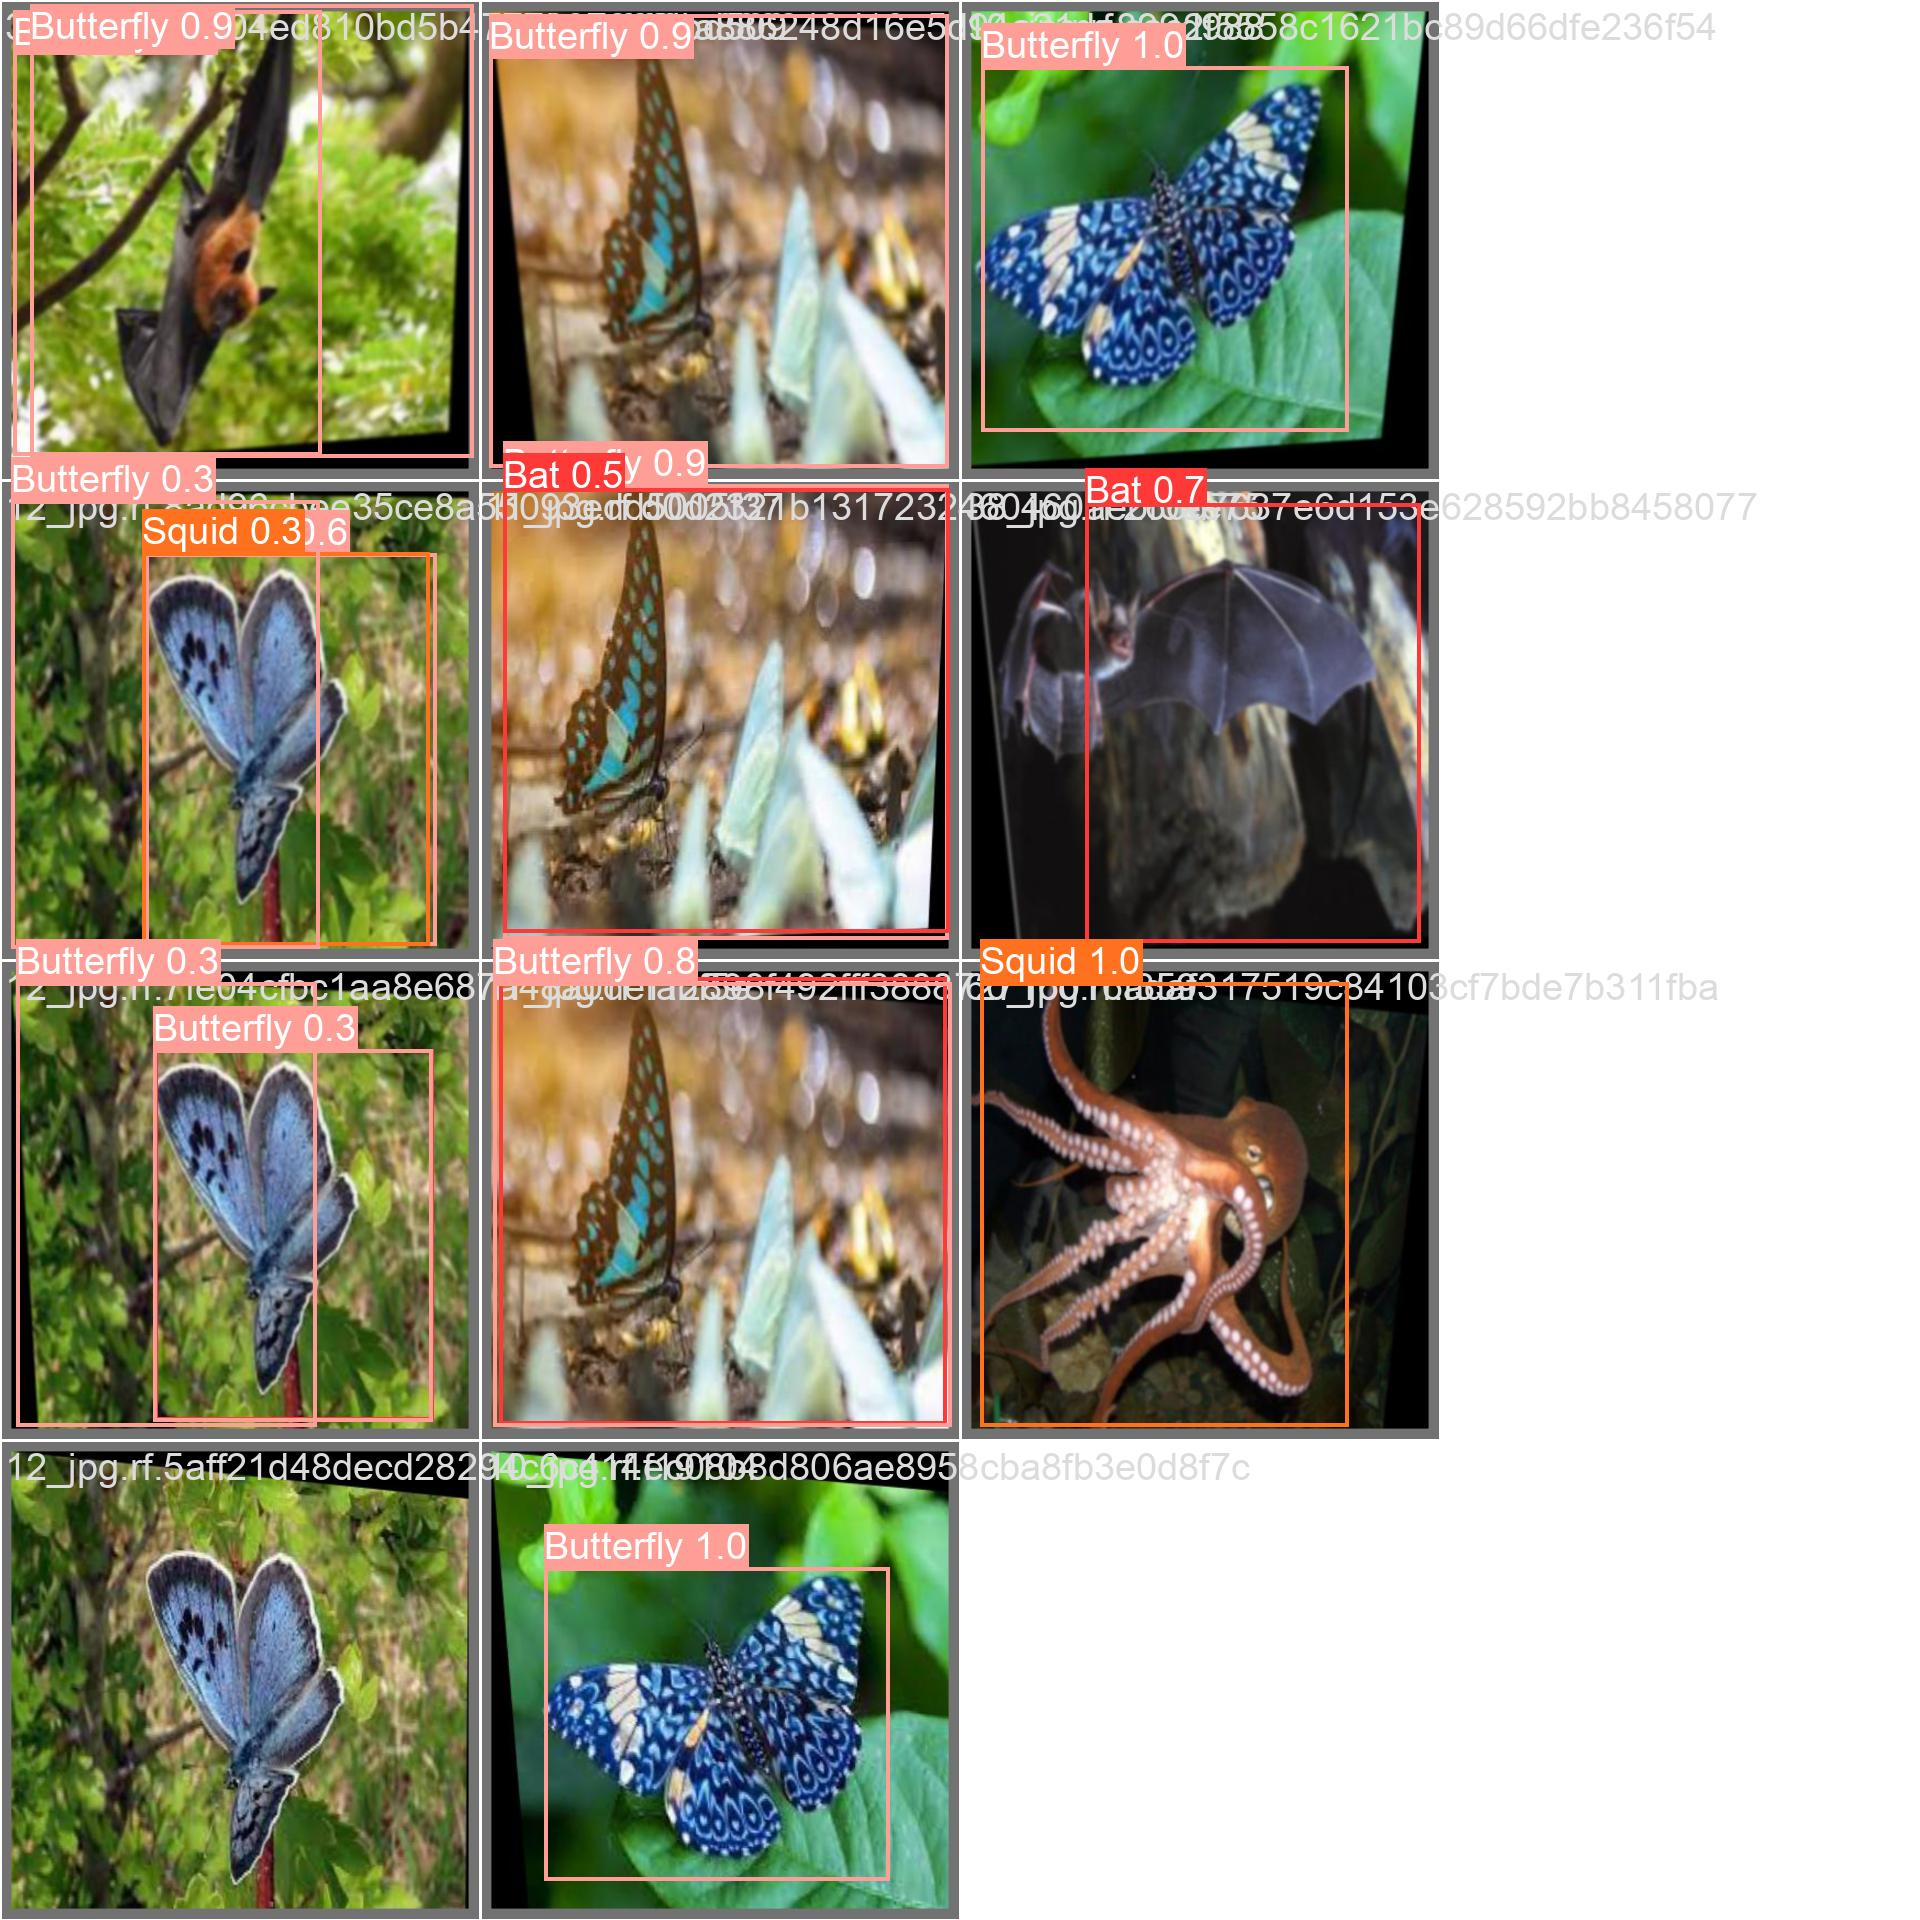

In [29]:
Image(filename='/content/runs/detect/train112/val_batch1_pred.jpg', width=600)

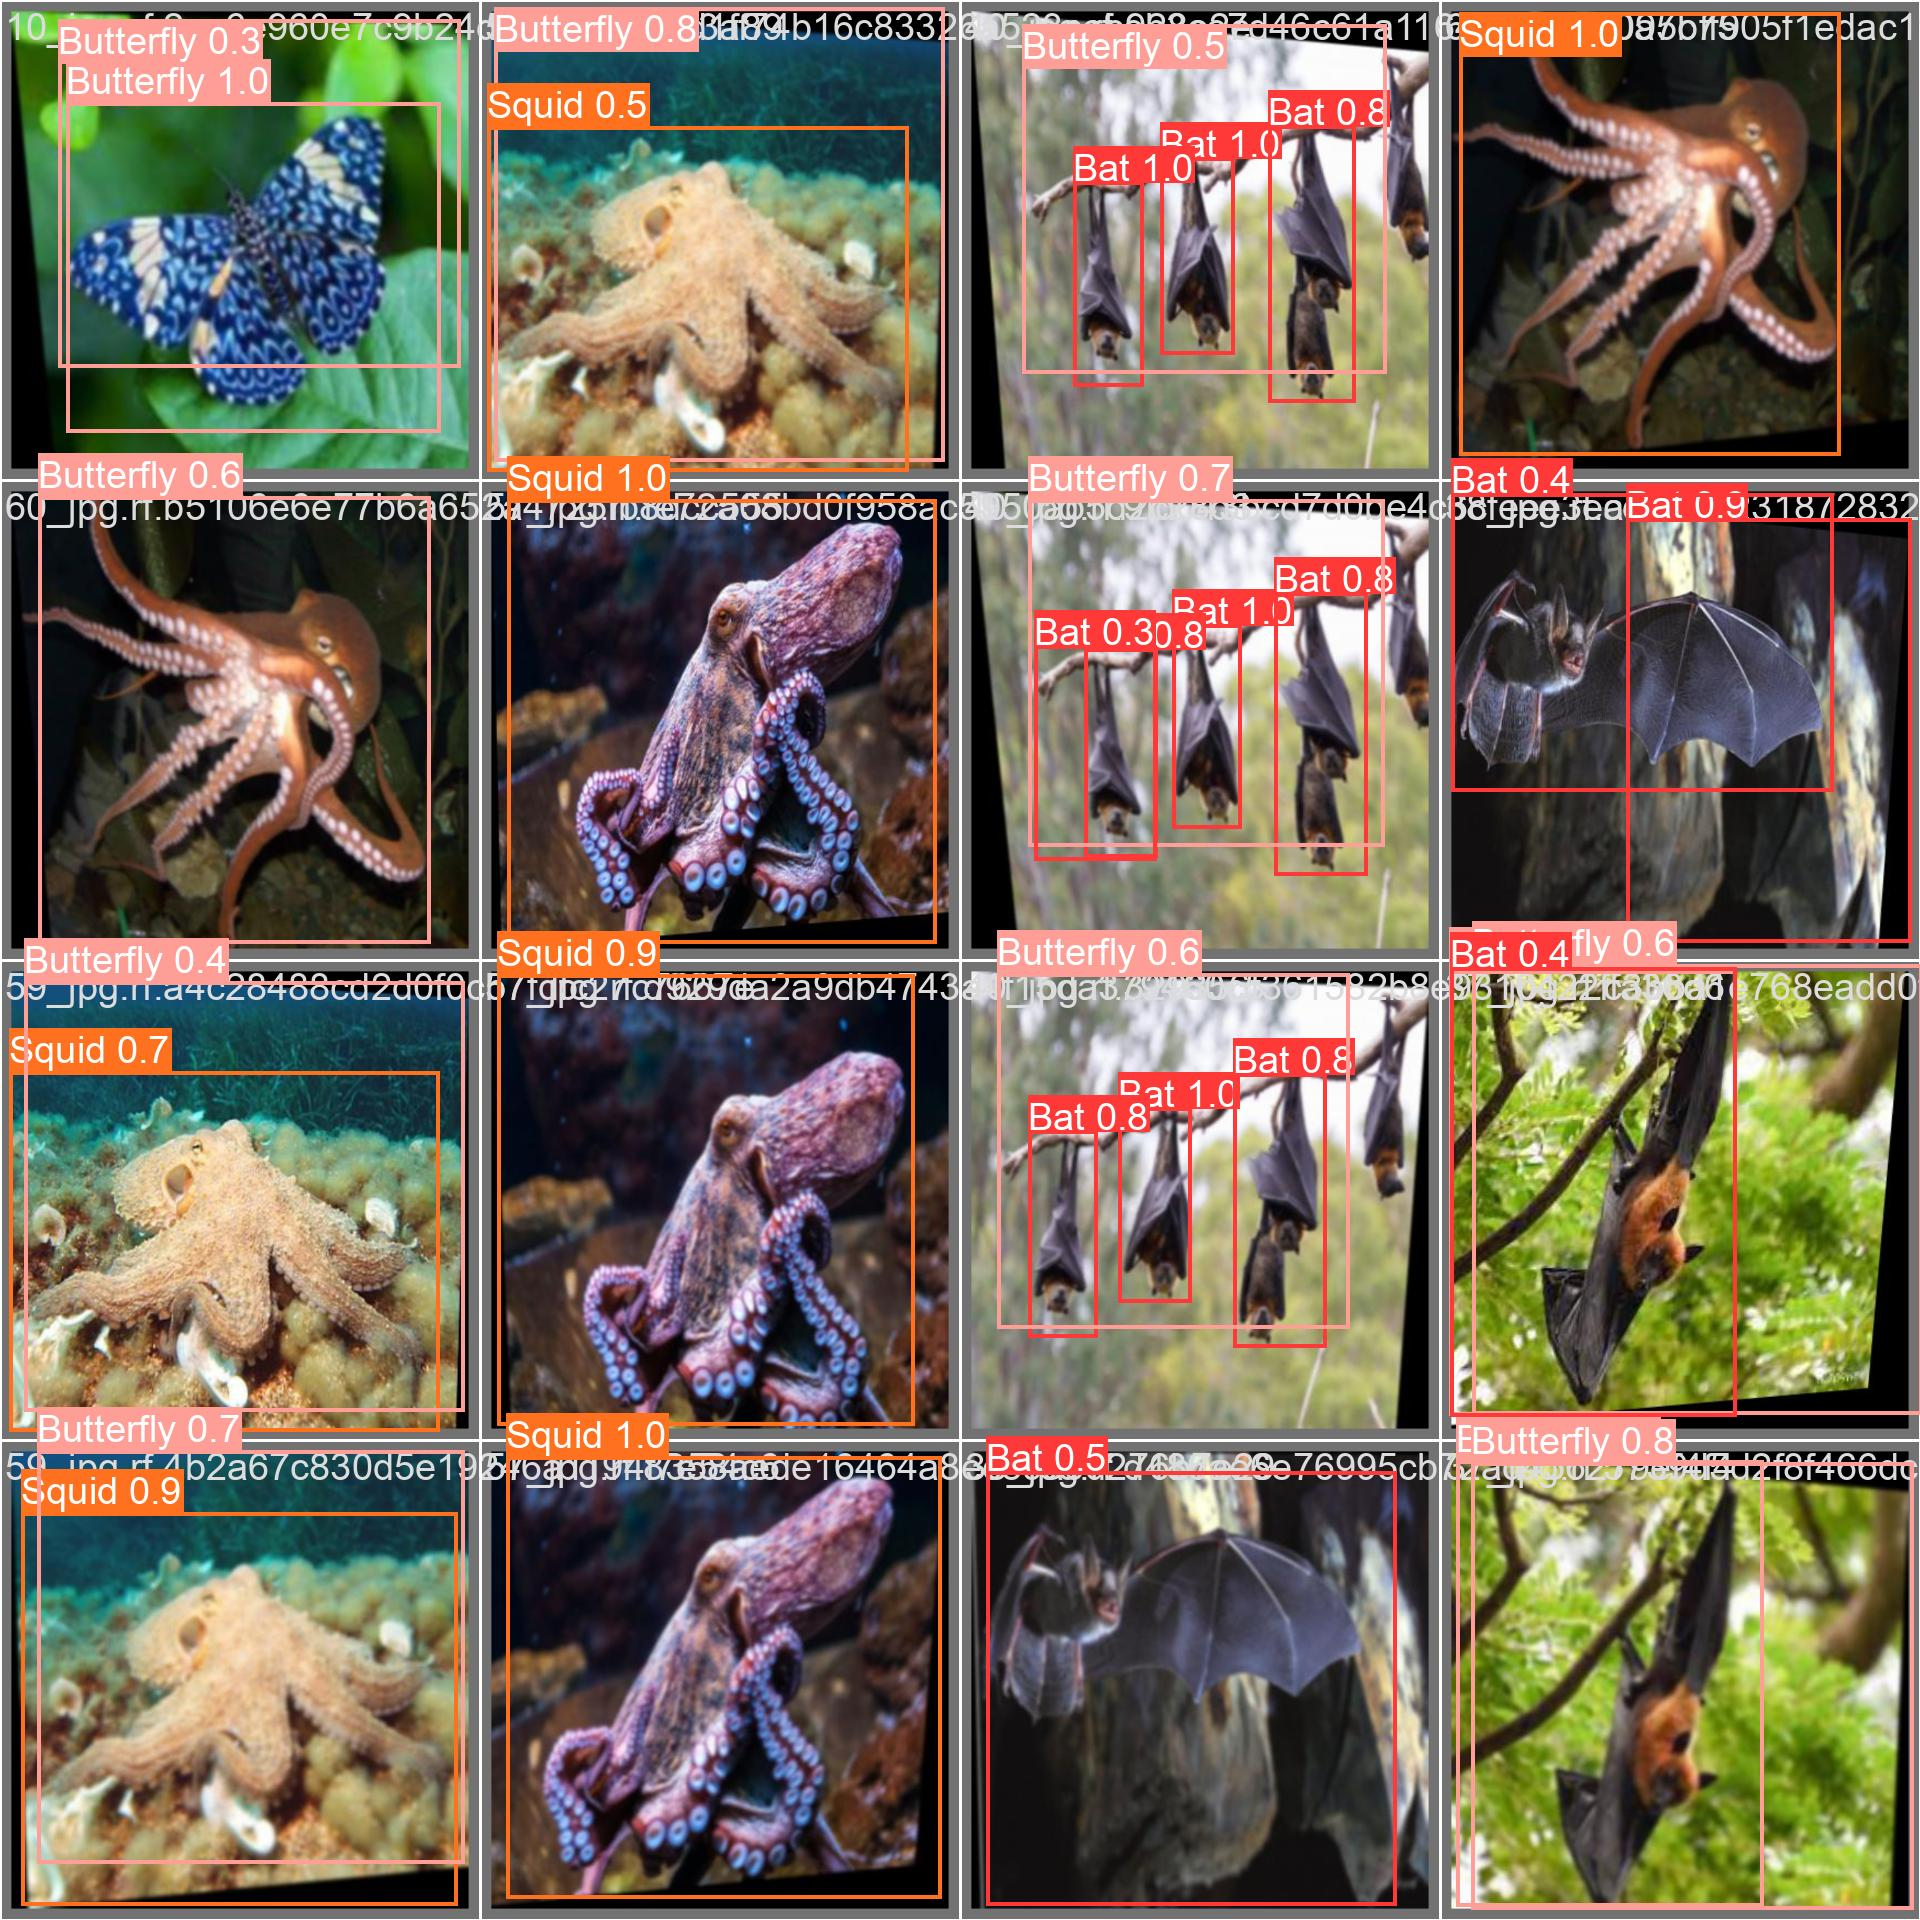

In [30]:
Image(filename='/content/runs/detect/train112/val_batch0_pred.jpg', width=600)

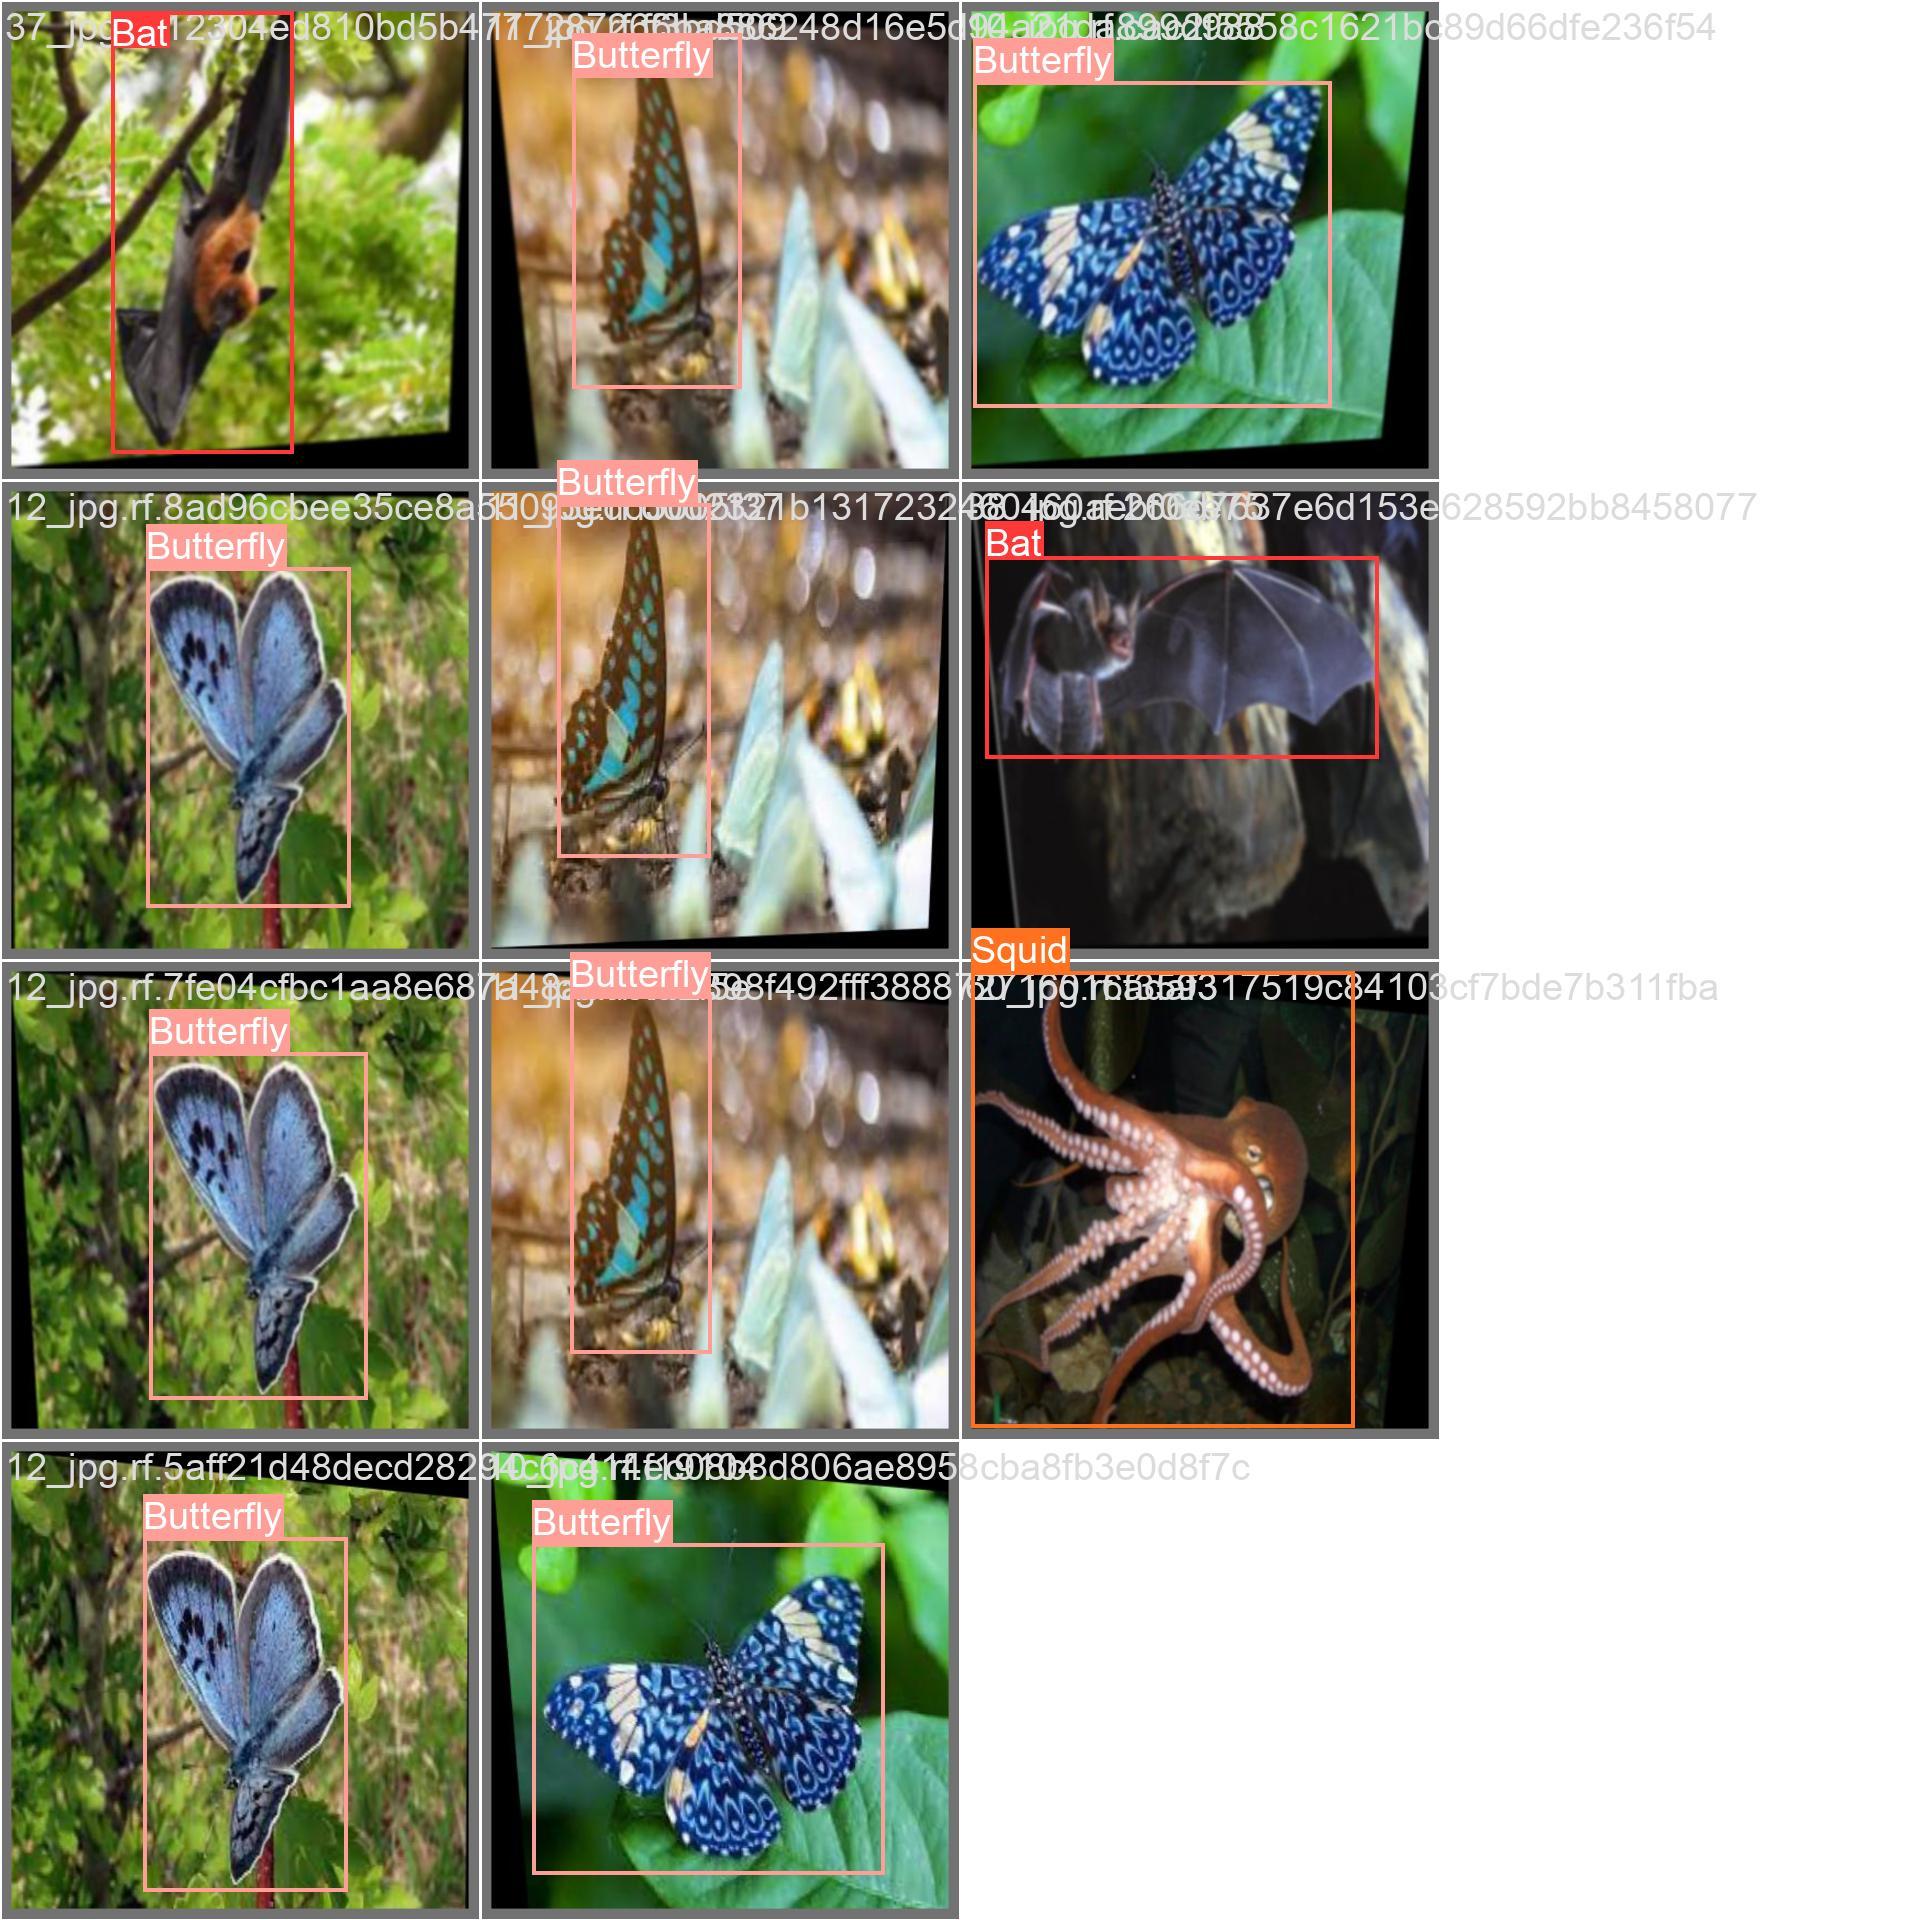

In [31]:
Image(filename='/content/runs/detect/train112/val_batch1_labels.jpg', width=600)